In [115]:
import os
import pandas as pd

# download the hf dataset at wellecks/minif2f_isabelle
import datasets
from datasets import load_dataset, load_metric

dataset = load_dataset("wellecks/minif2f_isabelle")
dataset

DatasetDict({
    validation: Dataset({
        features: ['problem_name', 'formal_statement', 'informal_statement', 'informal_proof', 'header'],
        num_rows: 244
    })
    test: Dataset({
        features: ['problem_name', 'formal_statement', 'informal_statement', 'informal_proof', 'header'],
        num_rows: 244
    })
})

In [116]:
dataset['validation'][2]

{'problem_name': 'aime_1994_p4',
 'formal_statement': 'theorem aime_1994_p4:\n  fixes n :: nat\n  assumes "0 < n"\n    and "(\\<Sum> k \\<in> {1..<n+1}. floor (ln k / ln 2)) = 1994" \n  shows "n = 312"',
 'informal_statement': 'Find the positive integer $n\\,$ for which\n$\n\\lfloor\\log_2{1}\\rfloor+\\lfloor\\log_2{2}\\rfloor+\\lfloor\\log_2{3}\\rfloor+\\cdots+\\lfloor\\log_2{n}\\rfloor=1994\n$\n(For real $x\\,$, $\\lfloor x\\rfloor\\,$ is the greatest integer $\\le x.\\,$) Show that it is 312.',
 'informal_proof': 'Note that if $2^x \\le a<2^{x+1}$ for some $x\\in\\mathbb{Z}$, then $\\lfloor\\log_2{a}\\rfloor=\\log_2{2^{x}}=x$. \n\nThus, there are $2^{x+1}-2^{x}=2^{x}$ integers $a$ such that $\\lfloor\\log_2{a}\\rfloor=x$. So the sum of $\\lfloor\\log_2{a}\\rfloor$ for all such $a$ is $x\\cdot2^x$. \n\nLet $k$ be the integer such that $2^k \\le n<2^{k+1}$. So for each integer $j<k$, there are $2^j$ integers $a\\le n$ such that $\\lfloor\\log_2{a}\\rfloor=j$, and there are $n-2^k+1$ s

In [111]:
# write a simple function to wrap my public google cloud run endpoint
# https://hello-isa2022-3b7dsng27q-uc.a.run.app/check_proof?proof=theorem%20gcd_lcm%3A%0A%20%20assumes%20%22gcd%20(n%20%3A%3A%20nat)%204%20%3D%201%22%20%0A%20%20%20%20and%20%22lcm%20(n%20%3A%3A%20nat)%204%20%3D%2028%22%0A%20%20shows%20%22n%20%3D%207%22%0Aproof%20-%0A%20%20have%20c1%3A%20%221*28%20%3D%20n*4%22%20using%20assms%0A%20%20%20%20sledgehammer%0A%20%20then%20have%20c2%3A%20%22n%20%3D%201*28%2F4%22%0A%20%20%20%20sledgehammer%0A%20%20then%20show%20%3Fthesis%0A%20%20%20%20sledgehammer%0Aqed
# this takes a sketch and returns a proof
import requests
import urllib.parse

def get_proof(sketch):
    encoded_sketch = urllib.parse.quote(sketch)
    url = "https://hello-isa2022-3b7dsng27q-uc.a.run.app/check_proof?proof=" + encoded_sketch
    response = requests.get(url)
    return response.json()

In [125]:
theorem_and_sledgehammer_proof = """theorem gcd_lcm:
  assumes "gcd (n :: nat) 4 = 1" 
      and "lcm (n :: nat) 4 = 28"
  shows "n = 7"
proof -
  have c1: "1*28 = n*4" using assms
    sledgehammer
  then have c2: "n = 1*28/4"
    sledgehammer
  then show ?thesis
    sledgehammer
qed"""
# then have c3: "125 - 4 = 121" using c1 c2
pf1 = """theorem mathd_algebra_547:
fixes x y :: real
assumes "x = 5"
and "y = 2"
shows "sqrt (x^3 - y^2) = 11"
proof -
have c1: "x^3 = 125" using assms
sledgehammer
then have c2: "y^2 = 4" using assms
sledgehammer
then have c3: "x^3 - y^2 = 121" using c1 c2
sledgehammer
then have c4: "sqrt 121 = 11"
sledgehammer
then show ?thesis
sledgehammer
qed"""
pfLm_test0 = """theorem induction_sum_odd:
  fixes n :: nat
  assumes "n > 0"
  shows "(\<Sum>(k::nat) = 0..(n-1). 2 * k + 1) = n^2"
proof (induction n)
  case 0
  then show ?case
    sledgehammer
next
  case (Suc n)
  then have "(\<Sum>(k::nat) = 0..(n-1). 2 * k + 1) = n^2"
    sledgehammer
  then have "(\<Sum>(k::nat) = 0..(n). 2 * k + 1) = (n+1)^2"
    sledgehammer
  then show ?case
    sledgehammer
qed"""
illeg = """theorem induction_divisibility_9div10tonm1:
  fixes n::nat
  shows "(9::nat) dvd 10^n - 1"
proof (induction n)
  case 0
  then show ?case
    sledgehammer
next
  case (Suc n)
  then have "9 dvd 10^(n+1) - 1"
    sledgehammer
  then show ?case
    sledgehammer
qed"""
# succ: mathd_algebra_190, 
get_proof(illeg)

{'last_step': 12,
 'num_steps': 16,
 'reason': 'Step error: Outer syntax error (line 1): command expected,\nbut identifier Timeout (line 1) was found\nAt command "<malformed>" (line 1)',
 'step_results': [{'index': 0,
   'output': '',
   'step': 'theory Interactive imports HOL.HOL Complex_Main "HOL-Library.Code_Target_Numeral" "HOL-Library.Sum_of_Squares" "Symmetric_Polynomials.Vieta" "HOL-Computational_Algebra.Computational_Algebra" "HOL-Number_Theory.Number_Theory" \n begin',
   'step_time': 0.01869034767150879},
  {'index': 1,
   'output': '',
   'step': 'theorem induction_divisibility_9div10tonm1:\n  fixes n::nat\n  shows "(9::nat) dvd 10^n - 1"',
   'step_time': 0.021746158599853516},
  {'index': 2,
   'output': '',
   'step': 'proof (induction n)',
   'step_time': 0.018561601638793945},
  {'index': 3,
   'output': '',
   'step': 'case 0',
   'step_time': 0.015210151672363281},
  {'index': 4,
   'output': '',
   'step': 'then',
   'step_time': 0.025851011276245117},
  {'index': 5,

In [39]:
import openai
# write a function to prompt the GPT-4 model
prompt_prefix = """Write a proof sketch of the following mathematical theorem. You do not need to prove facts of arithmetic like you would for a human. Your job will be to construct a proof sketch which can be filled in by the Isabelle sledgehammer:"""
prompt_suffix = """your response must have the following format:
REASONING
...
SKETCH
...


The sketch (which must include the theorem statement) should consist in a series of subgoals which rely on sledgehammer for their proof like in the following example. (Don't try tactics besides sledgehammer):
theorem gcd_lcm:
  assumes "gcd (n :: nat) 4 = 1" 
      and "lcm (n :: nat) 4 = 28"
  shows "n = 7"
proof -
  have c1: "1*28 = n*4" using assms
    sledgehammer
  then have c2: "n = 1*28/4"
    sledgehammer
  then show ?thesis
    sledgehammer
qed

DO NOT OUTPUT ADDITIONAL TEXT"""
def get_prompt(problem):
    return prompt_prefix + "\n{formal statement: " + problem['formal_statement'] + "}\n{informal statement: " + problem['informal_statement'] + "}\n\n" + prompt_suffix
from dotenv import load_dotenv
load_dotenv()
from openai import AsyncOpenAI
client = AsyncOpenAI()
import backoff
# Define the exception you want to handle, for example, aiohttp.ClientError
from aiohttp import ClientError
@backoff.on_exception(backoff.expo,
                      openai.RateLimitError, # Replace with the specific exception(s) you expect
                      max_tries=8, # Maximum number of retries
                      max_time=300) # Maximum total time to retry in seconds
async def ask_gpt(problem):
    prompt = get_prompt(problem)
    response = await client.chat.completions.create(
        model="gpt-4",
        max_tokens=1500,
        messages=[{"role": "user", "content": prompt}],
        temperature=0.0,
        timeout=120,
    )
    print(repr(problem))
    return response.choices[0].message.content

In [40]:
# take the first 6 problems and ask gpt to solve them in parallel
import aiohttp
import asyncio
import nest_asyncio
nest_asyncio.apply()
async def ask_gpt_async(problems):
    tasks = []
    for problem in problems:
        tasks.append(asyncio.create_task(ask_gpt(problem)))
    return await asyncio.gather(*tasks)
problems = [dataset['validation'][i] for i in range(200) if i % 2 == 0]
results = asyncio.run(ask_gpt_async(problems))
results

{'problem_name': 'mathd_algebra_104', 'formal_statement': 'theorem mathd_algebra_104:\n  fixes x :: real\n  assumes h0 : "125/8 = x /12"\n  shows "x = 375/2"', 'informal_statement': 'In a 8 fluid ounce bottle of Vitamin Water, there are 125 calories. How many calories would be contained in a 12 fluid ounce bottle? Express your answer in decimal form. Show that it is 187.5.', 'informal_proof': 'We know that there are 125 calories in 8 fluid ounces of Vitamin Water, so we can set up the proportion $\\frac{125}{8}=\\frac{x}{12}$, where $x$ is the number of calories contained in a 12 fluid ounce bottle. Solving for $x$, we find that $x=\\left(\\frac{125}{8}\\right)(12)=187.5$ calories.', 'header': '(*\n  Authors: Albert Qiaochu Jiang\n*)\n\ntheory mathd_algebra_104 imports\n  Complex_Main\nbegin\n\n'}
{'problem_name': 'mathd_numbertheory_81', 'formal_statement': 'theorem mathd_numbertheory_81:\n  "71 mod 3 = (2::nat)"', 'informal_statement': 'Determine the remainder of 71 (mod 3). Show tha

['REASONING\n\nThe given equation is $2^x * 3^y = 1296$. We can factorize 1296 as $2^4 * 3^4$. This implies that $x = 4$ and $y = 4$. Therefore, $x + y = 8$.\n\nSKETCH\n\ntheorem amc12b_2004_p3:\n  fixes x y :: nat\n  assumes "2^x * 3^y = 1296"\n  shows "x + y = 8"\nproof -\n  have c1: "2^x * 3^y = 2^4 * 3^4" using assms\n    sledgehammer\n  then have c2: "x = 4" and c3: "y = 4"\n    sledgehammer\n  then show ?thesis\n    sledgehammer\nqed',
 'REASONING\n\nThe sum of the floor of the logarithm base 2 of each number from 1 to n is given to be 1994. The floor function rounds down to the nearest integer, so the floor of the logarithm base 2 of a number k is the highest power of 2 that is less than or equal to k. \n\nFor example, the floor of the logarithm base 2 of 1 is 0, of 2 is 1, of 3 is 1, of 4 is 2, of 5 is 2, of 6 is 2, of 7 is 2, of 8 is 3, and so on. \n\nWe can see that the floor of the logarithm base 2 increases by 1 each time the number k doubles. Therefore, the sum of the floo

In [124]:
for r in results:
    print(r)

REASONING

The given equation is $2^x * 3^y = 1296$. We can factorize 1296 as $2^4 * 3^4$. This implies that $x = 4$ and $y = 4$. Therefore, $x + y = 8$.

SKETCH

theorem amc12b_2004_p3:
  fixes x y :: nat
  assumes "2^x * 3^y = 1296"
  shows "x + y = 8"
proof -
  have c1: "2^x * 3^y = 2^4 * 3^4" using assms
    sledgehammer
  then have c2: "x = 4" and c3: "y = 4"
    sledgehammer
  then show ?thesis
    sledgehammer
qed
REASONING

The sum of the floor of the logarithm base 2 of each number from 1 to n is given to be 1994. The floor function rounds down to the nearest integer, so the floor of the logarithm base 2 of a number k is the highest power of 2 that is less than or equal to k. 

For example, the floor of the logarithm base 2 of 1 is 0, of 2 is 1, of 3 is 1, of 4 is 2, of 5 is 2, of 6 is 2, of 7 is 2, of 8 is 3, and so on. 

We can see that the floor of the logarithm base 2 increases by 1 each time the number k doubles. Therefore, the sum of the floor of the logarithm base 2 of 

In [56]:
import aiohttp
import asyncio
import urllib.parse

async def get_proof(sketch):
    print(sketch)
    encoded_sketch = urllib.parse.quote(sketch)
    url = "https://hello-isa2022-3b7dsng27q-uc.a.run.app/check_proof?proof=" + encoded_sketch

    session = aiohttp.ClientSession()
    try:
        response = await session.get(url)
        if response.status != 200:
            print(f"Error: Received status code {response.status}")
            return None
        try:
            result = await response.json()
        except aiohttp.ContentTypeError:
            response_text = await response.text()
            print(f"Error: Expected JSON, but got: {response_text}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None
    finally:
        await session.close()
    
    return result
def synchronous_get_proof(sketch):
    return asyncio.run(get_proof(sketch))


In [ ]:
# we have 100 sketches, let's try to prove 10 at a time
from tqdm import tqdm
import time
proofs = []
for i in tqdm(range(0, 100, 10)):
    time.sleep(240)
    proofs += asyncio.run(asyncio.gather(*[get_proof(sketch) for sketch in sketches[i:i+10]]))


In [73]:
print('rejected: ', sum([p is None for p in proofs]))
print('solved: ', len([p for p in proofs if p is not None and p['success']]))

rejected:  21
solved:  10


In [55]:
sketches = [result.split("SKETCH")[1] for result in results]
sketches = ['theorem' + sketch.split("theorem")[1].split("qed")[0] + "qed" for sketch in sketches]
# asyncronously get the proofs
proofs = asyncio.run(asyncio.gather(*[get_proof(sketch) for sketch in sketches]))
proofs
# sketches

theorem amc12b_2004_p3:
  fixes x y :: nat
  assumes "2^x * 3^y = 1296"
  shows "x + y = 8"
proof -
  have c1: "2^x * 3^y = 2^4 * 3^4" using assms
    sledgehammer
  then have c2: "x = 4" and c3: "y = 4"
    sledgehammer
  then show ?thesis
    sledgehammer
qed
theorem aime_1994_p4:
  fixes n :: nat
  assumes "0 < n"
    and "(\<Sum> k \<in> {1..<n+1}. floor (ln k / ln 2)) = 1994" 
  shows "n = 312"
proof -
  have c1: "n <= 2^11" using assms
    sledgehammer
  then have c2: "n > 2^10" using assms
    sledgehammer
  then have c3: "n = 2^10 + 2^8 + 2^4" using assms
    sledgehammer
  then show ?thesis
    sledgehammer
qed
theorem mathd_algebra_437:
  fixes x y :: real
    and n :: int
  assumes "x^3 = -45"
    and "y^3 = -101"
    and "x < n"
    and "n < y" 
  shows "n = -4"
proof -
  have c1: "x = -45^(1/3)" using assms
    sledgehammer
  have c2: "y = -101^(1/3)" using assms
    sledgehammer
  have c3: "-45^(1/3) < n" using assms c1
    sledgehammer
  have c4: "n < -101^(1/3)" using a

ContentTypeError: 0, message='Attempt to decode JSON with unexpected mimetype: text/html', url=URL('https://hello-isa2022-3b7dsng27q-uc.a.run.app/check_proof?proof=theorem%20mathd_numbertheory_30:%0A%20%20%22(33818%5E2%20%2B%2033819%5E2%20%2B%2033820%5E2%20%2B%2033821%5E2%20%2B%2033822%5E2)%20mod%2017%20%3D%20(0::nat)%22%0Aproof%20-%0A%20%20have%20c1:%20%2233818%20mod%2017%20%3D%201%22%20%0A%20%20%20%20sledgehammer%0A%20%20have%20c2:%20%2233819%20mod%2017%20%3D%202%22%20%0A%20%20%20%20sledgehammer%0A%20%20have%20c3:%20%2233820%20mod%2017%20%3D%203%22%20%0A%20%20%20%20sledgehammer%0A%20%20have%20c4:%20%2233821%20mod%2017%20%3D%204%22%20%0A%20%20%20%20sledgehammer%0A%20%20have%20c5:%20%2233822%20mod%2017%20%3D%205%22%20%0A%20%20%20%20sledgehammer%0A%20%20have%20c6:%20%22(1%5E2%20%2B%202%5E2%20%2B%203%5E2%20%2B%204%5E2%20%2B%205%5E2)%20mod%2017%20%3D%200%22%20%0A%20%20%20%20sledgehammer%0A%20%20then%20show%20?thesis%20using%20c1%20c2%20c3%20c4%20c5%20c6%0A%20%20%20%20sledgehammer%0Aqed')

In [25]:
n_successes = [proof['success'] for proof in proofs]
n_successes

[False, True, False, False, False, False]

In [78]:
results[0]

'REASONING\n\nThe given equation is $2^x * 3^y = 1296$. We can factorize 1296 as $2^4 * 3^4$. This implies that $x = 4$ and $y = 4$. Therefore, $x + y = 8$.\n\nSKETCH\n\ntheorem amc12b_2004_p3:\n  fixes x y :: nat\n  assumes "2^x * 3^y = 1296"\n  shows "x + y = 8"\nproof -\n  have c1: "2^x * 3^y = 2^4 * 3^4" using assms\n    sledgehammer\n  then have c2: "x = 4" and c3: "y = 4"\n    sledgehammer\n  then show ?thesis\n    sledgehammer\nqed'

In [80]:
prompts = [get_prompt(dataset['validation'][i]) for i in range(200) if i % 2 == 0]
prompts[0]

'Write a proof sketch of the following mathematical theorem. You do not need to prove facts of arithmetic like you would for a human. Your job will be to construct a proof sketch which can be filled in by the Isabelle sledgehammer:\n{formal statement: theorem amc12b_2004_p3:\n  fixes x y :: nat\n  assumes "2^x * 3^y = 1296"\n  shows "x + y = 8"}\n{informal statement: If $x$ and $y$ are positive integers for which $2^x3^y=1296$, what is the value of $x+y$?\n\n$(\\mathrm {A})\\ 8 \\qquad (\\mathrm {B})\\ 9 \\qquad (\\mathrm {C})\\ 10 \\qquad (\\mathrm {D})\\ 11 \\qquad (\\mathrm {E})\\ 12$ Show that it is 8.}\n\nyour response must have the following format:\nREASONING\n...\nSKETCH\n...\n\n\nThe sketch (which must include the theorem statement) should consist in a series of subgoals which rely on sledgehammer for their proof like in the following example. (Don\'t try tactics besides sledgehammer):\ntheorem gcd_lcm:\n  assumes "gcd (n :: nat) 4 = 1" \n      and "lcm (n :: nat) 4 = 28"\n  s

In [83]:
# format texts as prompt + result
texts = [prompt + '\n<DIV>\n' + result for prompt, result in zip(prompts, results) if result is not None]
len(texts)

100

In [84]:
print(texts[0])

Write a proof sketch of the following mathematical theorem. You do not need to prove facts of arithmetic like you would for a human. Your job will be to construct a proof sketch which can be filled in by the Isabelle sledgehammer:
{formal statement: theorem amc12b_2004_p3:
  fixes x y :: nat
  assumes "2^x * 3^y = 1296"
  shows "x + y = 8"}
{informal statement: If $x$ and $y$ are positive integers for which $2^x3^y=1296$, what is the value of $x+y$?

$(\mathrm {A})\ 8 \qquad (\mathrm {B})\ 9 \qquad (\mathrm {C})\ 10 \qquad (\mathrm {D})\ 11 \qquad (\mathrm {E})\ 12$ Show that it is 8.}

your response must have the following format:
REASONING
...
SKETCH
...


The sketch (which must include the theorem statement) should consist in a series of subgoals which rely on sledgehammer for their proof like in the following example. (Don't try tactics besides sledgehammer):
theorem gcd_lcm:
  assumes "gcd (n :: nat) 4 = 1" 
      and "lcm (n :: nat) 4 = 28"
  shows "n = 7"
proof -
  have c1: "1*2

In [101]:
omit = """The sketch (which must include the theorem statement) should consist in a series of subgoals which rely on sledgehammer for their proof like in the following example. (Don't try tactics besides sledgehammer):
theorem gcd_lcm:
  assumes "gcd (n :: nat) 4 = 1" 
      and "lcm (n :: nat) 4 = 28"
  shows "n = 7"
proof -
  have c1: "1*28 = n*4" using assms
    sledgehammer
  then have c2: "n = 1*28/4"
    sledgehammer
  then show ?thesis
    sledgehammer
qed

DO NOT OUTPUT ADDITIONAL TEXT"""
omit2 = "Write a proof sketch of the following mathematical theorem. You do not need to prove facts of arithmetic like you would for a human. Your job will be to construct a proof sketch which can be filled in by the Isabelle sledgehammer:"
texts2 = [text.replace(omit, '').replace(omit2, '') for text in texts]

README.md: 100%|██████████| 269/269 [00:00<00:00, 1.62MB/s]


(array([1., 1., 2., 4., 1., 3., 5., 6., 6., 6., 3., 5., 1., 5., 1., 6., 2.,
        5., 6., 5., 5., 3., 4., 4., 2., 0., 0., 2., 0., 0., 1., 1., 0., 0.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([ 628. ,  675.1,  722.2,  769.3,  816.4,  863.5,  910.6,  957.7,
        1004.8, 1051.9, 1099. , 1146.1, 1193.2, 1240.3, 1287.4, 1334.5,
        1381.6, 1428.7, 1475.8, 1522.9, 1570. , 1617.1, 1664.2, 1711.3,
        1758.4, 1805.5, 1852.6, 1899.7, 1946.8, 1993.9, 2041. , 2088.1,
        2135.2, 2182.3, 2229.4, 2276.5, 2323.6, 2370.7, 2417.8, 2464.9,
        2512. , 2559.1, 2606.2, 2653.3, 2700.4, 2747.5, 2794.6, 2841.7,
        2888.8, 2935.9, 2983. ]),
 <BarContainer object of 50 artists>)

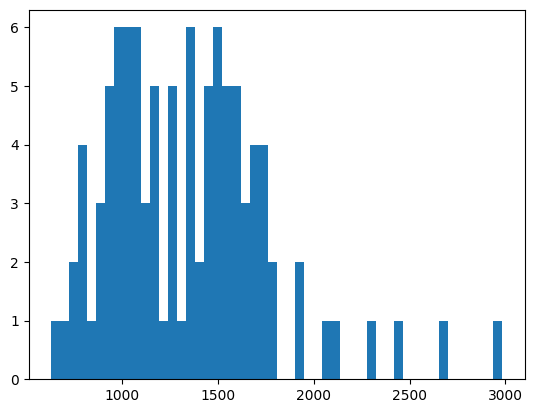

In [102]:
# upload the texts to a huggingface dataset called synthetic_isabelle
from datasets import Dataset
dataset = Dataset.from_dict({"text": texts2})
# push to huggingface
dataset.push_to_hub("oscarlaird/synthetic_isabelle")
# count n_chars in each text and make a hist w/ matplotlib
import matplotlib.pyplot as plt
n_chars = [len(text) for text in texts2]
plt.hist(n_chars, bins=50)



In [103]:
len(texts2[1])

1663

In [109]:
1893 * (500/760)

1245.3947368421054